# Imports

In [452]:
import pandas as pd

import matplotlib.pyplot as plt

import autograd.numpy as np
from autograd import grad 

# Data

In [453]:
data = {'x': [0, 1, 2, 3], 'y': [0, 1, 1, 2]}
df = pd.DataFrame(data)
y = df['y'].to_numpy().reshape((4,1))
x = df['x'].to_numpy().reshape((4,1))

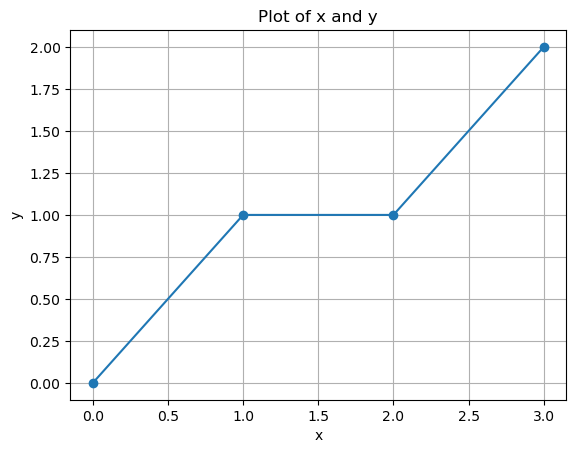

In [454]:
plt.plot(df['x'], df['y'], marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of x and y')
plt.grid(True)
plt.show()

# Lasso Regression

## Feature Map Calculation

$\phi = \begin{bmatrix} x^2 & x & 1 \end{bmatrix}$

In [455]:
def phi_1(x):
    return x ** 2
def phi_2(x):
    return x
def phi_3(x):
    return 1

In [456]:
def feature_map_calculation(x):
    basis_1_result = phi_1(x)
    basis_2_result = phi_2(x)
    basis_3_result = np.ones(len(basis_1_result))
    feature_map_samples = np.column_stack((basis_1_result, basis_2_result, basis_3_result))
    return feature_map_samples

In [457]:
feature_map_samples = feature_map_calculation(x)
feature_map_samples

array([[0., 0., 1.],
       [1., 1., 1.],
       [4., 2., 1.],
       [9., 3., 1.]])

## Weights

In [458]:
# Setting weights randomly for now
weights = np.array([[0],
                    [0],
                    [1]])

In [459]:
weights.shape

(3, 1)

# Gradient Descent for Basic 2nd Order Polynomial Function

In [460]:
lr = 0.01
epochs = 10
weights_autograd = np.array([[0],
                    [0],
                    [1]])

## Autograd Approach

In [461]:
def cost_function(x, weights):

    basis_1_result = phi_1(x)
    basis_2_result = phi_2(x)
    basis_3_result = np.ones(len(basis_1_result))
    feature_map_samples = np.column_stack((basis_1_result, basis_2_result, basis_3_result))

    return 0.5 * np.sum((np.dot(feature_map_samples, weights) - y) ** 2)

cost_function_prime_autograd = grad(cost_function, 1)

In [462]:
for i in range(epochs):
    weights_autograd = weights_autograd - lr * cost_function_prime_autograd(x, weights_autograd)

## By Hand Approach

In [463]:
lr = 0.01
epochs = 10
weights_hand = np.array([[0],
                    [0],
                    [1]])

In [464]:
def cost_function_prime_hand(x, weights):

    basis_1_result = phi_1(x)
    basis_2_result = phi_2(x)
    basis_3_result = np.ones(len(basis_1_result))
    feature_map_samples = np.column_stack((basis_1_result, basis_2_result, basis_3_result))

    sum = np.zeros((3,1))
    for i, row in enumerate(feature_map_samples):
        sum += (np.dot(weights.T, row.reshape((3,1))) - y[i]) * row.reshape((3,1))
    return sum
        

In [465]:
for i in range(epochs):
    weights_hand = weights_hand - lr * cost_function_prime_hand(x, weights_hand)

# Check

In [466]:
x

array([[0],
       [1],
       [2],
       [3]], dtype=int64)

In [467]:
cost_function_prime_hand(x, weights_hand)

array([[-0.2095622 ],
       [ 0.14497255],
       [ 1.05059422]])

In [468]:
cost_function_prime_autograd(x, weights_hand)

array([[-0.2095622 ],
       [ 0.14497255],
       [ 1.05059422]])

# Graphing the Results

In [469]:
df['y_pred_hand'] = np.dot(feature_map_calculation(x), weights_hand)
df['y_pred_autograd'] = np.dot(feature_map_calculation(x), weights_autograd)

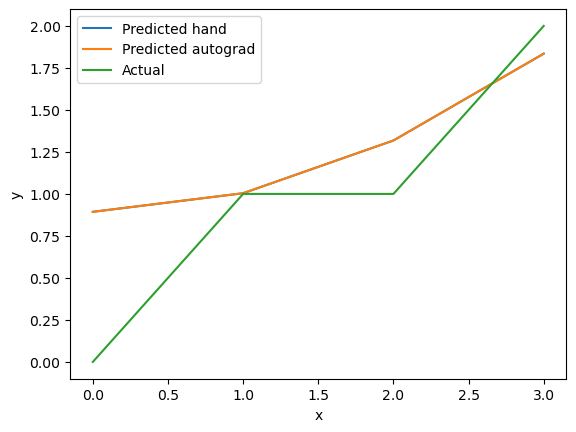

In [470]:
# Plot the predicted values and actual values
plt.plot(df['x'], df['y_pred_hand'], label='Predicted hand')
plt.plot(df['x'], df['y_pred_autograd'], label='Predicted autograd')
plt.plot(df['x'], df['y'], label='Actual')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()

# Gradient Descent for Lasso Regression

$\min_w \frac{1}{2} \| \phi w - y \|_2^2 + \lambda \| w \|_1$

In [471]:
lr = 0.01
epochs = 10
lasso_lambda = 1
weights_lasso = np.array([[0],
                    [0],
                    [1]])

In [472]:
def cost_function_prime_lasso(x, weights):

    basis_1_result = phi_1(x)
    basis_2_result = phi_2(x)
    basis_3_result = np.ones(len(basis_1_result))
    feature_map_samples = np.column_stack((basis_1_result, basis_2_result, basis_3_result))

    sum = np.zeros((3,1))
    for i, row in enumerate(feature_map_samples):
        sum += (np.dot(weights.T, row.reshape((3,1))) - y[i]) * row.reshape((3,1))
    return sum + lasso_lambda * np.sign(weights)
        

In [473]:
for i in range(epochs):
    weights_lasso = weights_lasso - lr * cost_function_prime_lasso(x, weights_lasso)

# Gradient Descent for Ridge Regression

$\min_w \frac{1}{2} \| \phi w - y \|_2^2 + \lambda \| w \|_2^2$

In [474]:
lr = 0.01
epochs = 10
ridge_lambda = 1
weights_ridge = np.array([[0],
                    [0],
                    [1]])

In [475]:
def cost_function_prime_ridge(x, weights):

    basis_1_result = phi_1(x)
    basis_2_result = phi_2(x)
    basis_3_result = np.ones(len(basis_1_result))
    feature_map_samples = np.column_stack((basis_1_result, basis_2_result, basis_3_result))

    sum = np.zeros((3,1))
    weights_signs = np.zeros((3,1))
    for i, row in enumerate(feature_map_samples):
        sum += (np.dot(weights.T, row.reshape((3,1))) - y[i]) * row.reshape((3,1))
    return sum + ridge_lambda * 2 * weights
        

In [476]:
for i in range(epochs):
    weights_ridge = weights_ridge - lr * cost_function_prime_ridge(x, weights_ridge)

# Gradient Descent for Elastic Ridge Regression

$\min_w \frac{1}{2} \| \phi w - y \|_2^2 + \lambda_1 \| w \|_1 + \lambda_2 \| w \|_2^2$

In [477]:
lr = 0.01
epochs = 10
elastic_lambda = 1
weights_elastic = np.array([[0],
                    [0],
                    [1]])

In [478]:
def cost_function_prime_ridge(x, weights):

    basis_1_result = phi_1(x)
    basis_2_result = phi_2(x)
    basis_3_result = np.ones(len(basis_1_result))
    feature_map_samples = np.column_stack((basis_1_result, basis_2_result, basis_3_result))

    sum = np.zeros((3,1))
    for i, row in enumerate(feature_map_samples):
        sum += (np.dot(weights.T, row.reshape((3,1))) - y[i]) * row.reshape((3,1))
    return sum + elastic_lambda * np.sign(weights) + elastic_lambda * 2 * weights
        

In [479]:
for i in range(epochs):
    weights_elastic = weights_elastic - lr * cost_function_prime_ridge(x, weights_elastic)

# Comparaison

In [480]:
df['y_pred_lasso'] = np.dot(feature_map_calculation(x), weights_lasso)
df['y_pred_ridge'] = np.dot(feature_map_calculation(x), weights_ridge)
df['y_pred_elastic'] = np.dot(feature_map_calculation(x), weights_elastic)

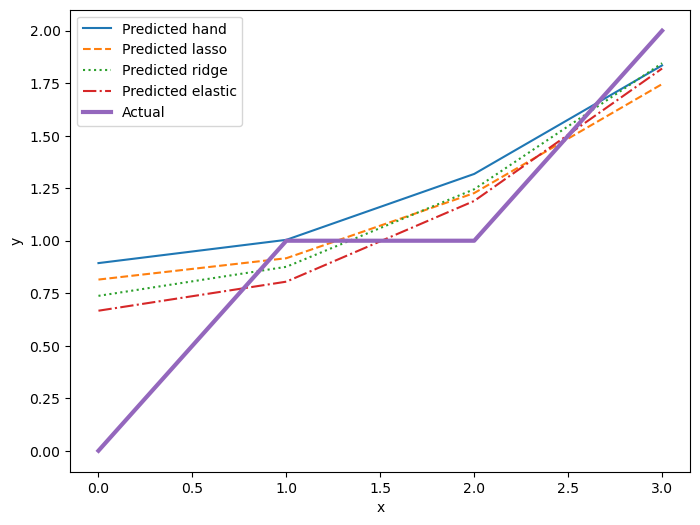

In [485]:
# Plot the predicted values and actual values
plt.figure(figsize=(8, 6))
plt.plot(df['x'], df['y_pred_hand'], label='Predicted hand')
# plt.plot(df['x'], df['y_pred_autograd'], label='Predicted autograd')
plt.plot(df['x'], df['y_pred_lasso'], label='Predicted lasso', linestyle='dashed')
plt.plot(df['x'], df['y_pred_ridge'], label='Predicted ridge', linestyle='dotted')
plt.plot(df['x'], df['y_pred_elastic'], label='Predicted elastic', linestyle='dashdot')
plt.plot(df['x'], df['y'], label='Actual', linewidth=3)

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()

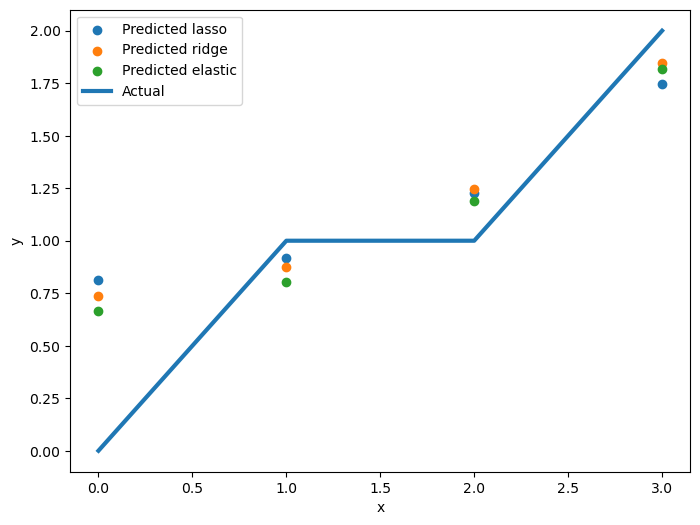

In [488]:
# Plot the predicted values and actual values
plt.figure(figsize=(8, 6))
# plt.plot(df['x'], df['y_pred_hand'], label='Predicted hand')
# plt.plot(df['x'], df['y_pred_autograd'], label='Predicted autograd')
plt.scatter(df['x'], df['y_pred_lasso'], label='Predicted lasso')
plt.scatter(df['x'], df['y_pred_ridge'], label='Predicted ridge')
plt.scatter(df['x'], df['y_pred_elastic'], label='Predicted elastic')
plt.plot(df['x'], df['y'], label='Actual', linewidth=3)

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()

In [482]:
df

,x,y,y_pred_hand,y_pred_autograd,y_pred_lasso,y_pred_ridge,y_pred_elastic
0,0,0,0.893453,0.893453,0.815047,0.737472,0.666715
1,1,1,1.004212,1.004212,0.916665,0.875807,0.805055
2,2,1,1.318028,1.318028,1.226935,1.245128,1.189491
3,3,2,1.834902,1.834902,1.745857,1.845435,1.820024
